In [12]:
import numpy as np
import matplotlib.pyplot as plt
x=np.random.uniform(0,2*np.pi,(100,1))
y=np.sin(x)+np.random.normal(0,(0.1),(100,1))

In [13]:
least_val_error=float('inf')
best_degree=0
for m in range(1,5):
    X=x**m
    for i in range(m-1,-1,-1):
        X=np.hstack([X,x**i])
    val_error=0
    train_error=0
    for k in range(1,6):
        X_train = np.vstack([X[:(k-1)*20],X[k*20:]])
        Y_train = np.vstack([y[:(k-1)*20],y[k*20:]])
        X_val = X[(k-1)*20:k*20]
        Y_val = y[(k-1)*20:k*20]
        W=[]
        if(np.linalg.cond(X_train.T @ X_train) < 1/np.finfo(X_train.dtype).eps):
            W=np.linalg.inv((X_train.T@X_train))@X_train.T@Y_train
        else:
            W=np.linalg.inv((X_train.T@X_train)+np.eye(X_train.shape[1])*1e-3)@X_train.T@Y_train
        train_error+=(Y_train-X_train@W).T@(Y_train-X_train@W)
        val_error+=(Y_val-X_val@W).T@(Y_val-X_val@W)/20
    val_error=val_error/5
    print("Val error for degree ",m,"is ",val_error)
    if(val_error<least_val_error):
        least_val_error=val_error
        best_degree=m
X=x**best_degree
for i in range(best_degree-1,-1,-1):
    X=np.hstack([X,x**i])
W=[]
if(np.linalg.cond(X.T@X)<1/np.finfo(X.dtype).eps):
    W=np.linalg.inv((X.T@X))@X.T@y
else:
    W=np.linalg.inv((X.T@X+np.eye(X.shape[1])*1e-3))@X.T@y
print(X.shape)
print(W.shape)
train_error=(y-X@W).T@(y-X@W)/100
print(train_error)



Val error for degree  1 is  [[0.22008664]]
Val error for degree  2 is  [[0.23051153]]
Val error for degree  3 is  [[0.01467623]]
Val error for degree  4 is  [[0.01489247]]
(100, 4)
(4, 1)
[[0.01265731]]


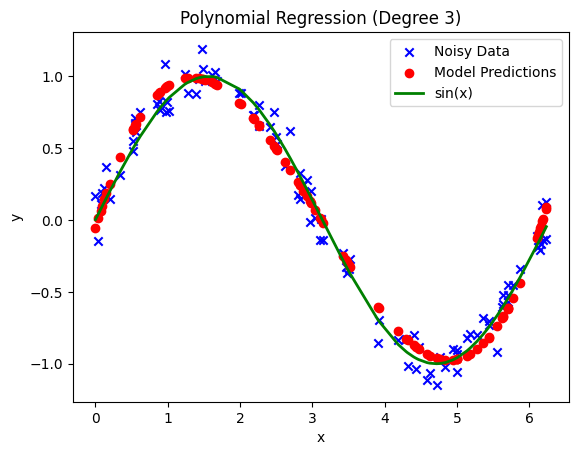

In [14]:
plt.scatter(x,y,label="Noisy Data",color='blue',marker='x')
plt.scatter(x,X@W,label="Model Predictions",color='red')
plt.plot(np.sort(x,axis=0),np.sin(np.sort(x, axis=0)),label="sin(x)",color='green',linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title(f"Polynomial Regression (Degree {best_degree})")
plt.show()
